In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import datetime
import os
from WindPy import w
from scipy.stats import stats
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [2]:
pnl = pd.read_pickle('C:/Users/jgtzsx01/Documents/workspace/zjsxzy_in_js/website/everyday-update/data/price.pkl')

In [3]:
df = pd.read_csv('C:/Users/jgtzsx01/Documents/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.csv', index_col=1)

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df.shape[0]

1822

In [182]:
wdf = pd.read_excel('C:/Users/jgtzsx01/Documents/workspace/zjsxzy_in_js/website/everyday-update/data/881001_weight.xlsx', index_col=0)

In [183]:
wdf = wdf[wdf.index.map(lambda x: x in pnl.items)]

In [184]:
wdf.head()

,证券名称,权重
Wind代码,,
000001.SZ,平安银行,0.338145
000002.SZ,万科A,0.825451
000004.SZ,国农科技,0.005935
000005.SZ,世纪星源,0.018782
000006.SZ,深振业A,0.036380


In [185]:
wdf.sort_index().head()

,证券名称,权重
Wind代码,,
000001.SZ,平安银行,0.338145
000002.SZ,万科A,0.825451
000004.SZ,国农科技,0.005935
000005.SZ,世纪星源,0.018782
000006.SZ,深振业A,0.036380


In [186]:
wdf = wdf.sort_index()

In [187]:
df = df[(df.index >= pnl.major_axis[0]) & (df.index <= pnl.major_axis[-1])]

In [188]:
df.index = pnl.major_axis[1:]

In [189]:
df.shape

(1394, 2)

In [190]:
pnl.shape

(3137, 1395, 5)

In [191]:
df.head()

,close,return
2011-10-11 00:00:00.005,2296.5129,NaN
2011-10-12 00:00:00.005,2367.7161,NaN
2011-10-13 00:00:00.005,2389.1013,NaN
2011-10-14 00:00:00.005,2380.6648,NaN
2011-10-17 00:00:00.005,2390.9915,NaN


In [232]:
df['return'] = df['close'].pct_change(25)

In [233]:
pnl.ix[:, :, 'return'] = pnl.minor_xs('close').pct_change(25)

In [234]:
pnl.ix[:, :, 'return sqr'] = pnl.minor_xs('return') ** 2

In [235]:
pnl.minor_xs('return sqr').multiply(wdf[u'权重']**2, axis=1).tail()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2017-06-28 00:00:00.005,0.000854,0.065886,0.000003,3.075605e-07,1.569957e-06,0.0,2.431685e-08,0.000019,1.718146e-07,0.000005,...,0.000005,4.707844e-08,4.476505e-07,9.407239e-09,3.030166e-08,0.000082,3.112482e-07,3.354541e-06,1.088865e-10,2.898230e-07
2017-06-29 00:00:00.005,0.000606,0.064794,0.000003,3.261435e-08,9.715560e-06,0.0,1.842276e-06,0.000073,4.146389e-08,0.000002,...,0.000004,2.549144e-09,2.437511e-06,5.318039e-08,1.457296e-07,0.000113,1.108786e-06,3.149907e-06,2.529732e-08,2.466178e-06
2017-06-30 00:00:00.005,0.000496,0.061814,0.000003,3.063532e-07,1.016863e-05,0.0,5.902759e-06,0.000062,6.636744e-08,0.000004,...,0.000004,1.991552e-10,1.307228e-06,3.230424e-08,1.625111e-07,0.000131,3.753239e-07,3.654241e-07,2.684210e-07,2.673806e-06
2017-07-03 00:00:00.005,0.000124,0.026857,0.000003,5.061364e-09,2.220841e-06,0.0,6.198327e-07,0.000043,9.404309e-08,0.000002,...,0.000004,3.242550e-09,2.856965e-06,5.060211e-08,1.428614e-07,0.000135,1.758716e-07,3.380833e-07,2.882316e-07,2.650375e-05
2017-07-04 00:00:00.005,0.000080,0.017677,0.000003,1.314667e-09,1.849163e-07,0.0,2.756448e-06,0.000057,2.185483e-07,0.000002,...,0.000004,7.621350e-09,2.176825e-06,3.941934e-08,1.273690e-07,0.000088,1.249760e-08,4.966532e-08,2.183399e-07,2.905628e-05


In [236]:
concentration = (df['return']**2) * (wdf[u'权重']**2).sum() / pnl.minor_xs('return sqr').multiply(wdf[u'权重']**2, axis=1).sum(axis=1)[1:]

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


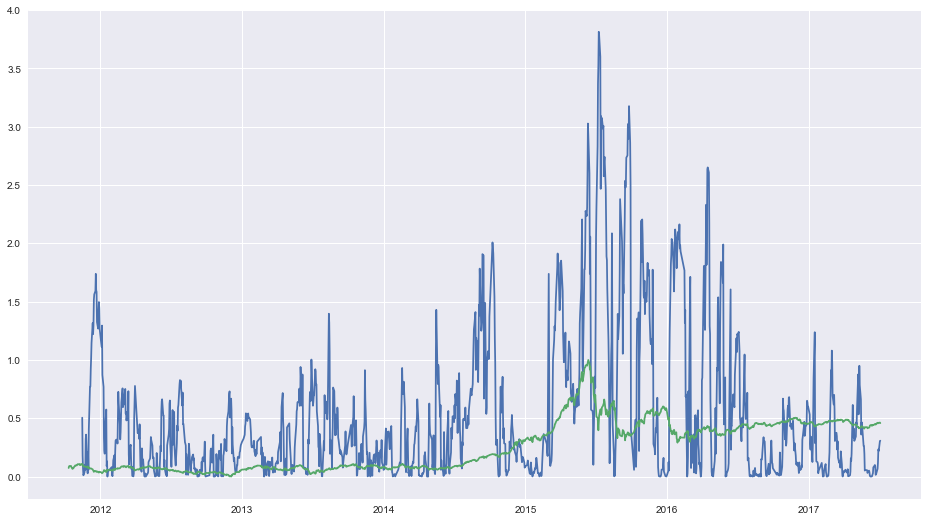

In [237]:
plt.figure(figsize=(16, 9))
scaler = preprocessing.MinMaxScaler()
plt.plot(concentration)
plt.plot(df.index, scaler.fit_transform(df['close']))

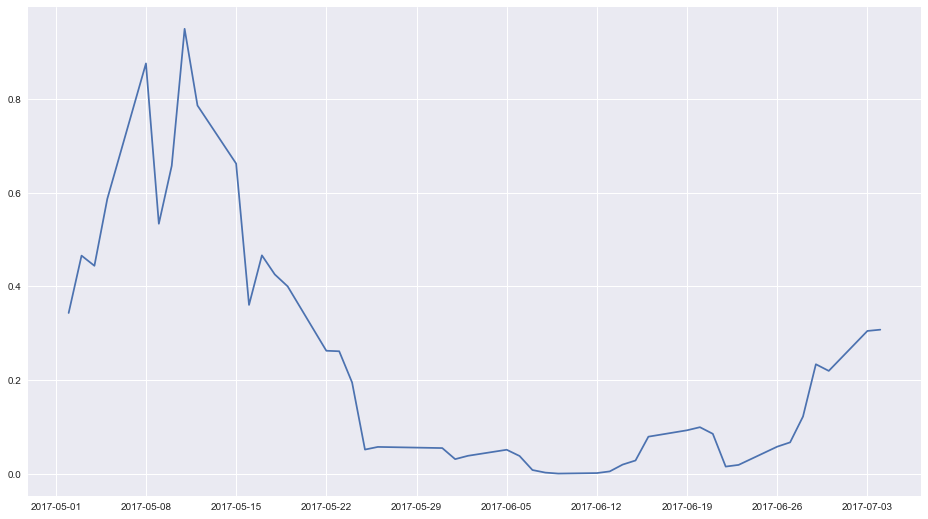

In [239]:
plt.figure(figsize=(16, 9))
plt.plot(concentration[concentration.index >= '2017-05-01'])

In [240]:
concentration.sort(ascending=False)

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [241]:
concentration

2015-07-09 00:00:00.005    3.813892e+00
2015-07-10 00:00:00.005    3.783806e+00
2015-07-13 00:00:00.005    3.600909e+00
2015-07-08 00:00:00.005    3.528194e+00
2015-07-07 00:00:00.005    3.369938e+00
2015-09-25 00:00:00.005    3.176407e+00
2015-07-15 00:00:00.005    3.089932e+00
2015-07-17 00:00:00.005    3.075112e+00
2015-06-11 00:00:00.005    3.026957e+00
2015-09-23 00:00:00.005    3.024571e+00
2015-07-16 00:00:00.005    3.017207e+00
2015-07-21 00:00:00.005    3.007739e+00
2015-09-22 00:00:00.005    2.999360e+00
2015-07-20 00:00:00.005    2.982075e+00
2015-06-12 00:00:00.005    2.932616e+00
2015-09-24 00:00:00.005    2.897651e+00
2015-09-28 00:00:00.005    2.861492e+00
2015-07-06 00:00:00.005    2.832370e+00
2015-09-21 00:00:00.005    2.753793e+00
2015-07-24 00:00:00.005    2.741600e+00
2015-09-18 00:00:00.005    2.733982e+00
2015-07-23 00:00:00.005    2.705190e+00
2016-04-15 00:00:00.005    2.650987e+00
2016-04-14 00:00:00.005    2.636336e+00
2016-04-18 00:00:00.005    2.607069e+00
